In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv('/home/smayan/Desktop/DJS-compute-tasks/DJS-compute-tasks/Task 3/Data/student dropout.csv')
# df = pd.read_csv('/workspaces/DJS-compute-tasks/Task 3/Data/student dropout.csv')

In [3]:
df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False


**Checking the datatypes and null values in the dataframe.**

In [4]:
df.dtypes

School                         object
Gender                         object
Age                             int64
Address                        object
Family_Size                    object
Parental_Status                object
Mother_Education                int64
Father_Education                int64
Mother_Job                     object
Father_Job                     object
Reason_for_Choosing_School     object
Guardian                       object
Travel_Time                     int64
Study_Time                      int64
Number_of_Failures              int64
School_Support                 object
Family_Support                 object
Extra_Paid_Class               object
Extra_Curricular_Activities    object
Attended_Nursery               object
Wants_Higher_Education         object
Internet_Access                object
In_Relationship                object
Family_Relationship             int64
Free_Time                       int64
Going_Out                       int64
Weekend_Alco

In [5]:
df.isnull().sum()

School                         0
Gender                         0
Age                            0
Address                        0
Family_Size                    0
Parental_Status                0
Mother_Education               0
Father_Education               0
Mother_Job                     0
Father_Job                     0
Reason_for_Choosing_School     0
Guardian                       0
Travel_Time                    0
Study_Time                     0
Number_of_Failures             0
School_Support                 0
Family_Support                 0
Extra_Paid_Class               0
Extra_Curricular_Activities    0
Attended_Nursery               0
Wants_Higher_Education         0
Internet_Access                0
In_Relationship                0
Family_Relationship            0
Free_Time                      0
Going_Out                      0
Weekend_Alcohol_Consumption    0
Weekday_Alcohol_Consumption    0
Health_Status                  0
Number_of_Absences             0
Grade_1   

**This is a clean dataset with no null values.**

In [6]:
df.columns

Index(['School', 'Gender', 'Age', 'Address', 'Family_Size', 'Parental_Status',
       'Mother_Education', 'Father_Education', 'Mother_Job', 'Father_Job',
       'Reason_for_Choosing_School', 'Guardian', 'Travel_Time', 'Study_Time',
       'Number_of_Failures', 'School_Support', 'Family_Support',
       'Extra_Paid_Class', 'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'In_Relationship',
       'Family_Relationship', 'Free_Time', 'Going_Out',
       'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption',
       'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2',
       'Final_Grade', 'Dropped_Out'],
      dtype='object')

**Lets inspect all the non-numeric values**

In [7]:
non_numeric = ['School', 'Gender','Address', 'Family_Size','Parental_Status', 'Mother_Job', 'Father_Job','Reason_for_Choosing_School', 'Guardian',
               'School_Support', 'Family_Support',
       'Extra_Paid_Class', 'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'In_Relationship']

**Encoding the categorical features into numeric values so that the model can use them as input features.**

In [8]:
labelencoder = LabelEncoder()

In [9]:
df_encoded = df.copy()
df_encoded[non_numeric] = df_encoded[non_numeric].apply(lambda col: labelencoder.fit_transform(col))


In [10]:
df_encoded.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,False
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,False
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,False
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,False
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,False


<Axes: >

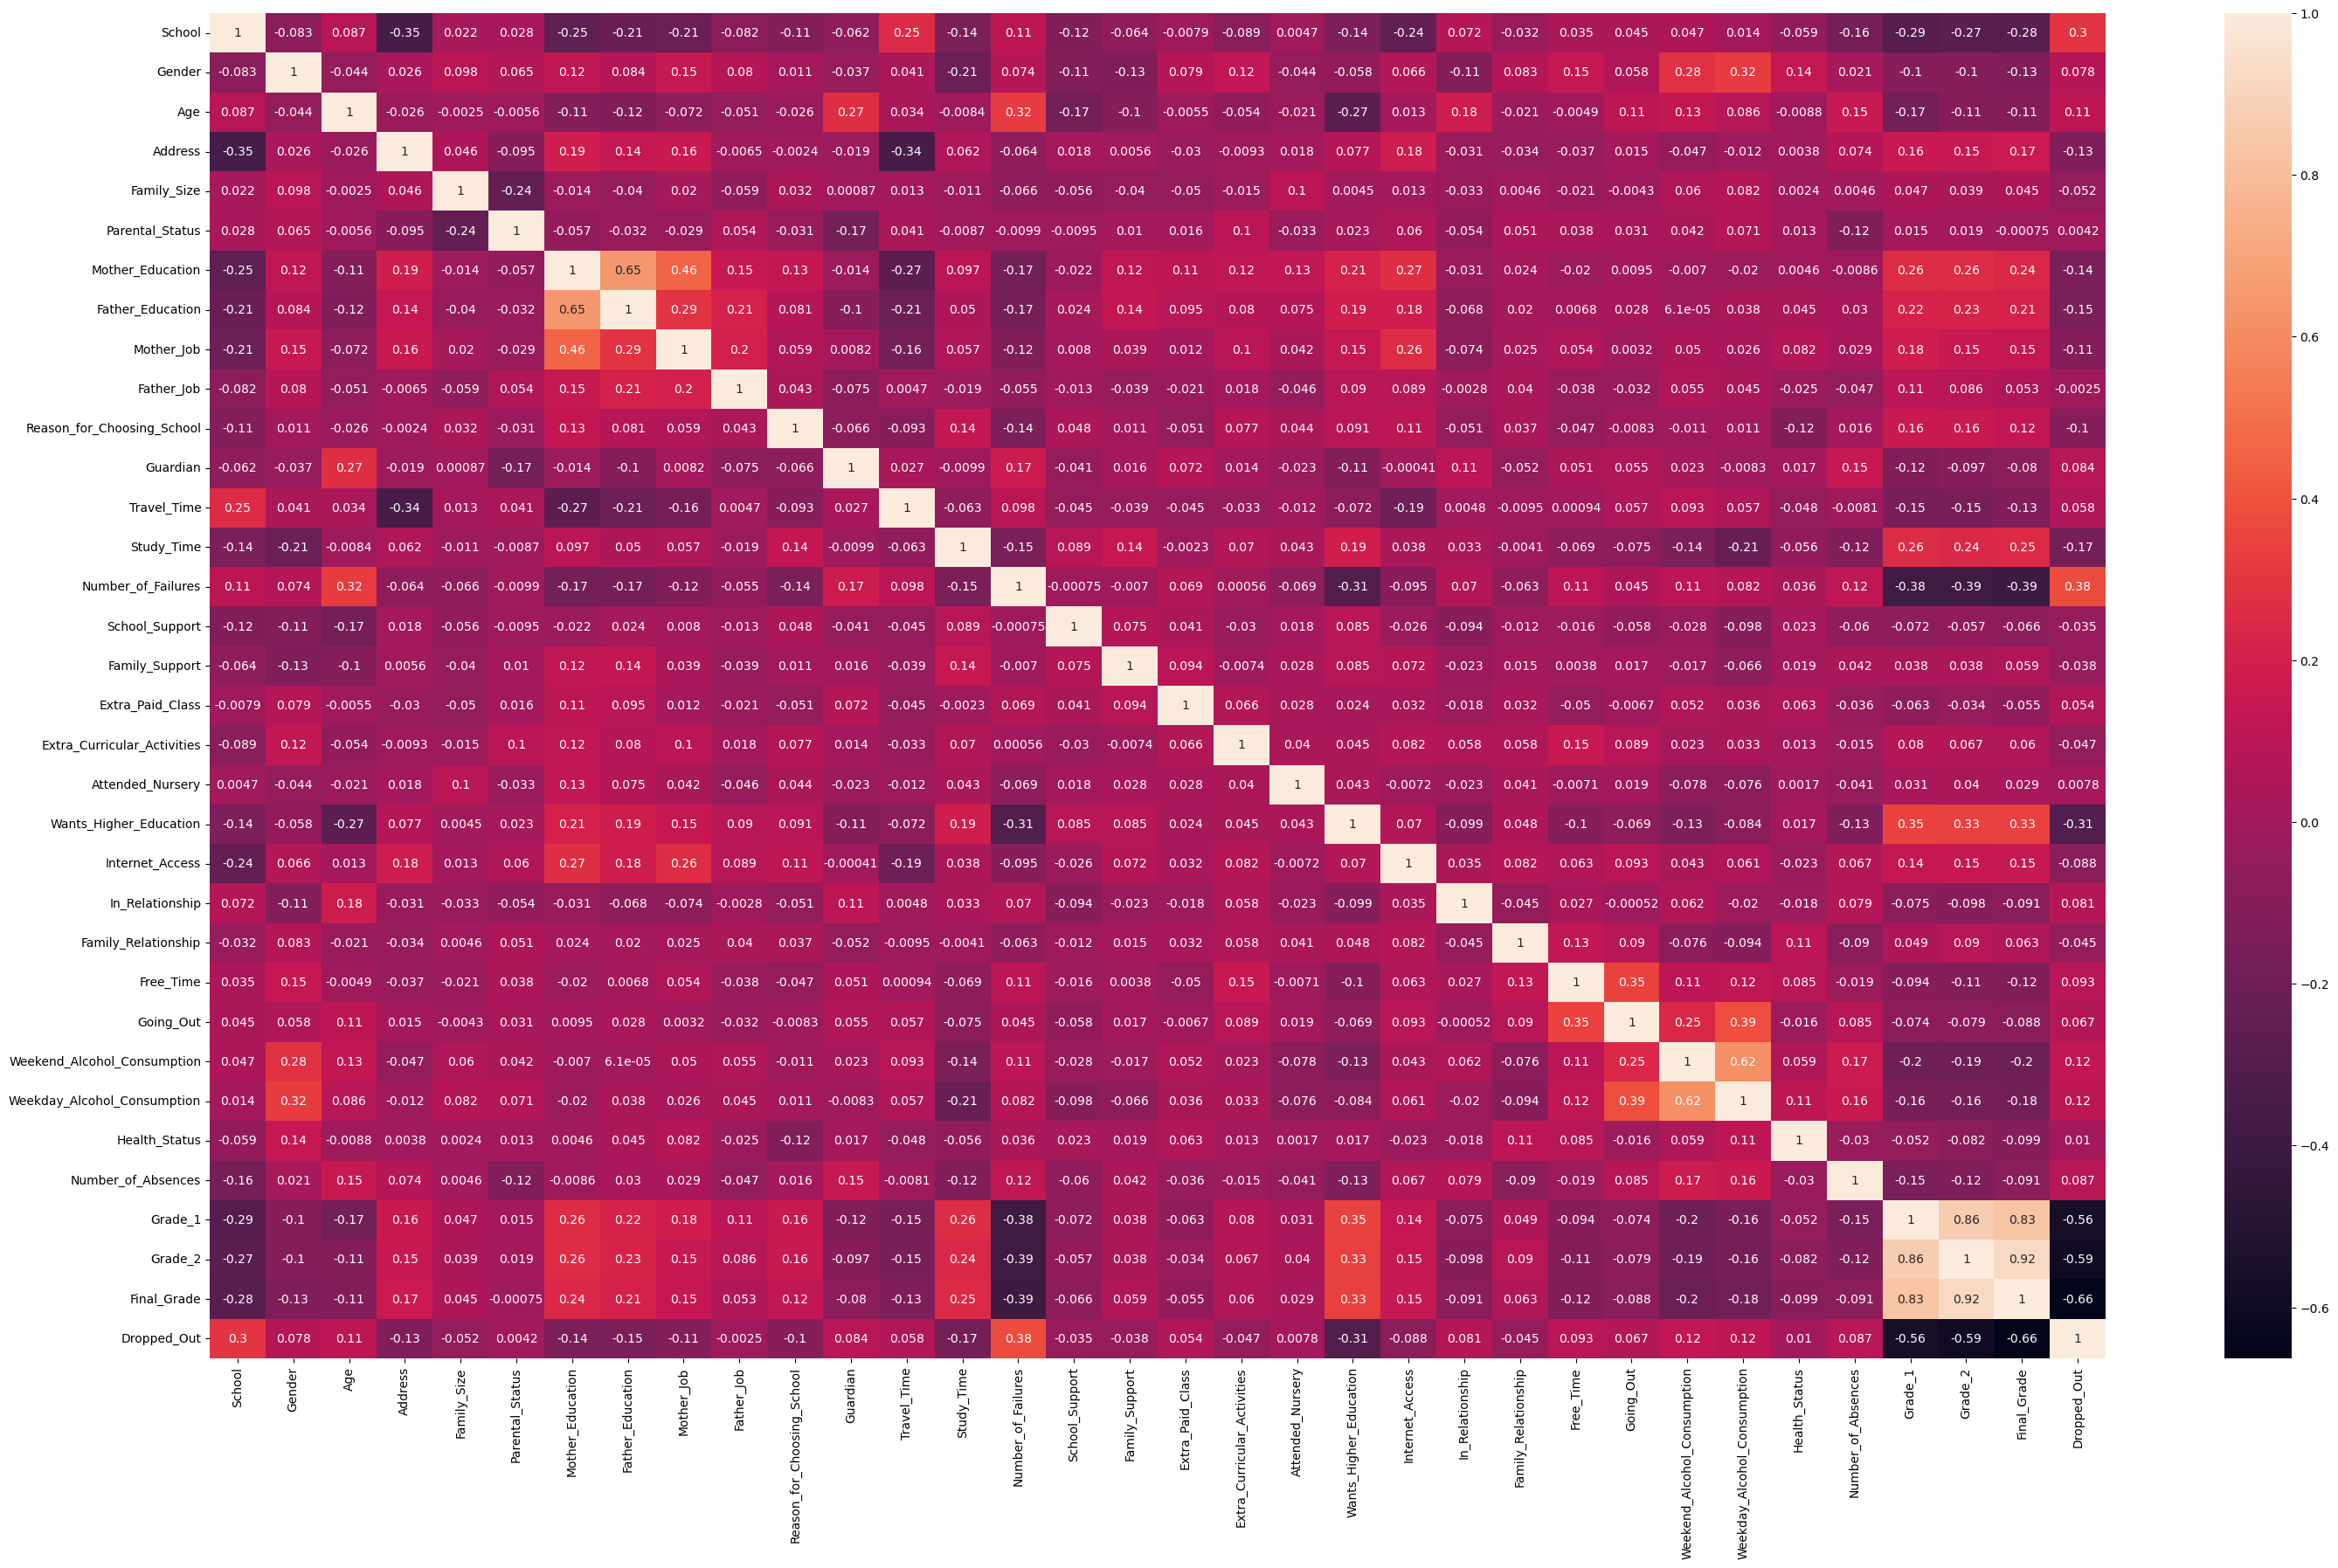

In [11]:
fig, ax = plt.subplots(figsize = (35, 20))
corrm = df_encoded.corr()
sns.heatmap(corrm, annot=True)

**Keeping track of all the columns which have very less correlation with the target value.**

In [12]:
df_encoded.columns

Index(['School', 'Gender', 'Age', 'Address', 'Family_Size', 'Parental_Status',
       'Mother_Education', 'Father_Education', 'Mother_Job', 'Father_Job',
       'Reason_for_Choosing_School', 'Guardian', 'Travel_Time', 'Study_Time',
       'Number_of_Failures', 'School_Support', 'Family_Support',
       'Extra_Paid_Class', 'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'In_Relationship',
       'Family_Relationship', 'Free_Time', 'Going_Out',
       'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption',
       'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2',
       'Final_Grade', 'Dropped_Out'],
      dtype='object')

In [13]:
lesseffct = ['Gender','Family_Size', 'Parental_Status','Father_Job','Guardian', 'Travel_Time','School_Support', 'Family_Support',
       'Extra_Paid_Class', 'Extra_Curricular_Activities', 'Attended_Nursery','Internet_Access', 'In_Relationship',
       'Family_Relationship', 'Free_Time', 'Going_Out','Number_of_Absences']

#### **Lets first try fitting and evaluating a model using all the features.**

In [14]:
X = df_encoded.drop(columns=['Dropped_Out'])
y = df_encoded['Dropped_Out']

In [15]:
df_encoded.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,False
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,False
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,False
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,False
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,False


**Training the model.**

In [16]:
clf = SVC(class_weight='balanced')  #Using weight = balanced as the dataset is imbalanced
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
clf.fit(X_train_scaled, y_train)

SVC(class_weight='balanced')

In [18]:
y_pred = clf.predict(X_test_scaled)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class problems
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')


Accuracy: 0.9384615384615385
Precision: 0.9434343434343434
Recall: 0.9384615384615385
F1 Score: 0.9402908468776733
Confusion Matrix:
[[161   8]
 [  4  22]]
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.95      0.96       169
        True       0.73      0.85      0.79        26

    accuracy                           0.94       195
   macro avg       0.85      0.90      0.87       195
weighted avg       0.94      0.94      0.94       195



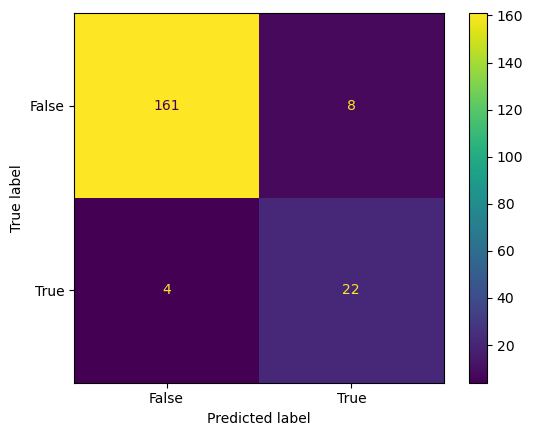

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X_test_scaled, y=y_test);

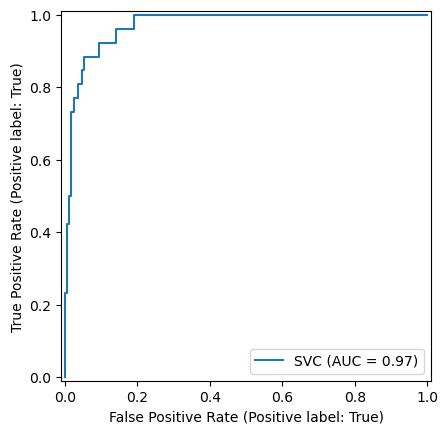

In [21]:
from sklearn.metrics import RocCurveDisplay, precision_recall_curve

roc_curve_display = RocCurveDisplay.from_estimator(estimator=clf, 
                                                   X=X_test_scaled, 
                                                   y=y_test)

#### **Now lets try fitting with reduced features with respect to correlation heatmap**

In [22]:
lesseffct

['Gender',
 'Family_Size',
 'Parental_Status',
 'Father_Job',
 'Guardian',
 'Travel_Time',
 'School_Support',
 'Family_Support',
 'Extra_Paid_Class',
 'Extra_Curricular_Activities',
 'Attended_Nursery',
 'Internet_Access',
 'In_Relationship',
 'Family_Relationship',
 'Free_Time',
 'Going_Out',
 'Number_of_Absences']

In [23]:
df2 = df_encoded.drop(columns=['Gender',
 'Family_Size',
 'Parental_Status',
 'Father_Job',
 'Guardian',
 'Travel_Time',
 'School_Support',
 'Family_Support',
 'Extra_Paid_Class',
 'Extra_Curricular_Activities',
 'Attended_Nursery',
 'Internet_Access',
 'In_Relationship',
 'Family_Relationship',
 'Free_Time',
 'Going_Out',
 'Number_of_Absences'])

In [24]:
df2.head()

,School,Age,Address,Mother_Education,Father_Education,Mother_Job,Reason_for_Choosing_School,Study_Time,Number_of_Failures,Wants_Higher_Education,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,0,18,1,4,4,0,0,2,0,1,1,1,3,0,11,11,False
1,0,17,1,1,1,0,0,2,0,1,1,1,3,9,11,11,False
2,0,15,1,1,1,0,2,2,0,1,2,3,3,12,13,12,False
3,0,15,1,4,2,1,1,3,0,1,1,1,5,14,14,14,False
4,0,16,1,3,3,2,1,2,0,1,1,2,5,11,13,13,False


In [25]:
X2 = df2.drop(columns=['Dropped_Out'])
y2 = df2['Dropped_Out']

In [26]:
clf2 = SVC(class_weight='balanced')
scaler2 = StandardScaler()

In [27]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.3, random_state=42)

In [28]:
X_train2_scaled = scaler2.fit_transform(X_train2)
X_test2_scaled = scaler2.transform(X_test2)

In [29]:
clf2.fit(X_train2_scaled, y_train2)

SVC(class_weight='balanced')

In [30]:
y_pred2 = clf2.predict(X_test2_scaled)

In [31]:
accuracy = accuracy_score(y_test2, y_pred2)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test2, y_pred2, average='weighted')  # Use 'weighted' for multi-class problems
print(f'Precision: {precision}')

recall = recall_score(y_test2, y_pred2, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test2, y_pred2, average='weighted')
print(f'F1 Score: {f1}')

cm2 = confusion_matrix(y_test2, y_pred2)
print(f'Confusion Matrix:\n{cm2}')

report = classification_report(y_test2, y_pred2)
print(f'Classification Report:\n{report}')

Accuracy: 0.9025641025641026
Precision: 0.9195833333333333
Recall: 0.9025641025641026
F1 Score: 0.9084192867938944
Confusion Matrix:
[[155  14]
 [  5  21]]
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.92      0.94       169
        True       0.60      0.81      0.69        26

    accuracy                           0.90       195
   macro avg       0.78      0.86      0.82       195
weighted avg       0.92      0.90      0.91       195



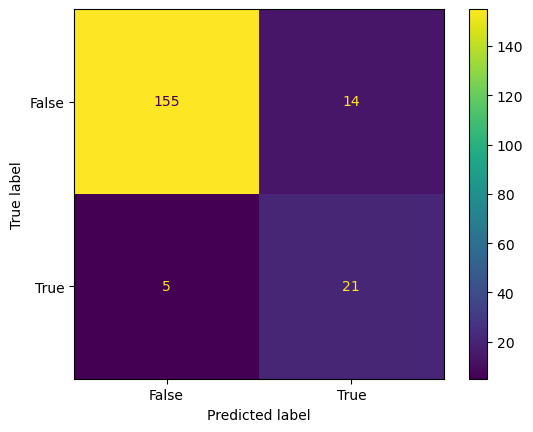

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf2, X=X_test2_scaled, y=y_test2);

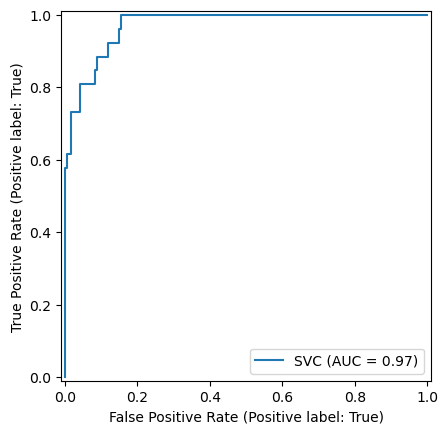

In [33]:
roc_curve_display = RocCurveDisplay.from_estimator(estimator=clf2, 
                                                   X=X_test2_scaled, 
                                                   y=y_test2)

### **Comparing these results we can say that the clf trained on the whole training set is better than the one trained on a reduced set.**
* **Now trying Hyperparameter Tuning**

In [34]:
param_grid = {
    'C': [0.1, 1, 10, 100],               
    'kernel': ['linear', 'rbf', 'poly'],  
    'gamma': ['scale', 'auto'],            
    'degree': [2, 3, 4],                 
}


grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1)

In [35]:
X3 = df_encoded.drop(columns=['Dropped_Out'])
y3 = df_encoded['Dropped_Out']
scaler3 = StandardScaler()

In [36]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

X_train3_scaled = scaler3.fit_transform(X_train3)
X_test3_scaled = scaler3.transform(X_test3)
grid_search.fit(X_train3_scaled, y_train3)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [42]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.9911


In [43]:
best_clf = grid_search.best_estimator_
y_pred3 = best_clf.predict(X_test3_scaled)

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       169
        True       1.00      1.00      1.00        26

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195



In [35]:
y_pred3 = best_clf.predict(X_test3_scaled)

accuracy = accuracy_score(y_test3, y_pred3)
print(f'Accuracy: {accuracy:.4f}')


precision = precision_score(y_test3, y_pred3, average='weighted')
print(f'Precision: {precision:.4f}')


recall = recall_score(y_test3, y_pred3, average='weighted')
print(f'Recall: {recall:.4f}')


f1 = f1_score(y_test3, y_pred3, average='weighted')
print(f'F1 Score: {f1:.4f}')


cm3 = confusion_matrix(y_test3, y_pred3)
print(f'Confusion Matrix:\n{cm3}')

report = classification_report(y_test3, y_pred3)
print(f'Classification Report:\n{report}')


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[169   0]
 [  0  26]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       169
        True       1.00      1.00      1.00        26

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195



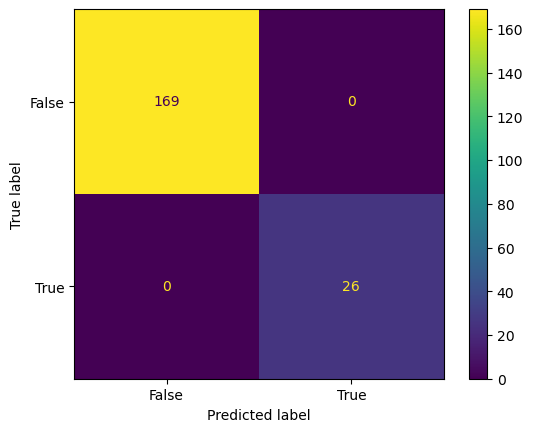

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=best_clf, X=X_test3_scaled, y=y_test3);

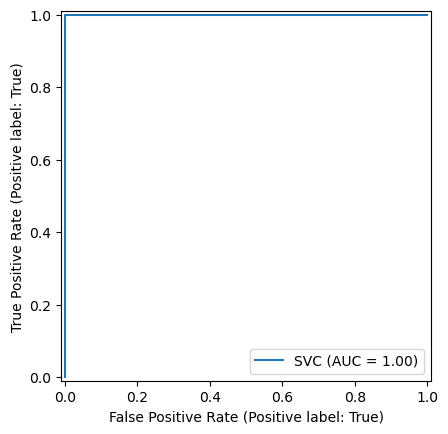

In [37]:
roc_curve_display = RocCurveDisplay.from_estimator(estimator=best_clf, 
                                                   X=X_test3_scaled, 
                                                   y=y_test3)

### **The model has improved a lot after parameter tuning.**

#### **Saving all fitted models and transformers**

In [39]:
import pickle
pickle.dump(best_clf, open('/home/smayan/Desktop/DJS-compute-tasks/DJS-compute-tasks/Task 3/Data/SVC_clf.sav','wb'))
pickle.dump(scaler3, open('DJS-compute-tasks/Task 3/Data/SVC_scaler.sav','wb'))
pickle.dump(labelencoder, open('/home/smayan/Desktop/DJS-compute-tasks/DJS-compute-tasks/Task 3/Data/encoder.sav','wb'))